In [ ]:
# https://github.com/nicknochnack/DrugLabelExtraction-/blob/main/Paddle%20OCR%20Tutorial.ipynb

#https://colab.research.google.com/drive/1P1pECt1sKSPkQbAkIzd5QRGzVP7T9FLv#scrollTo=np6EFsIWPNrF

In [ ]:
# # GitHub repo installation of paddle
# !pip install paddlepaddle-gpu==2.6.0 -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
# paddlepaddle cpu
# !pip install paddlepaddle==2.6.0

In [ ]:
# Install paddle OCR
# !pip install paddleocr

In [ ]:
# Clone paddle OCR repo - get FONTS for visualization
# !git clone https://github.com/PaddlePaddle/PaddleOCR

In [1]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

In [2]:
# Setup model
ocr_model = PaddleOCR(lang='pt')

[2024/02/28 18:51:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\kennedy.reis/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\kennedy.reis/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch

In [21]:
img_path = os.path.join('.', 'images/copo.jpg')

In [22]:
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path)

[2024/02/28 18:53:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/02/28 18:53:38] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.2288224697113037
[2024/02/28 18:53:39] ppocr DEBUG: rec_res num  : 4, elapsed : 0.3809936046600342


In [23]:
result

[[[[[205.0, 229.0], [367.0, 225.0], [368.0, 291.0], [206.0, 295.0]],
   ('CHEGOU', 0.9121503233909607)],
  [[[213.0, 283.0], [360.0, 285.0], [359.0, 333.0], [212.0, 330.0]],
   ('AMELHOR', 0.9904369115829468)],
  [[[203.0, 316.0], [363.0, 321.0], [362.0, 381.0], [201.0, 376.0]],
   ('ESTACAO', 0.9588649868965149)],
  [[[220.0, 385.0], [334.0, 394.0], [332.0, 428.0], [218.0, 420.0]],
   ('OMO', 0.6885185241699219)]]]

In [24]:
for res in result[0]:
  print(res[1][0])

CHEGOU
AMELHOR
ESTACAO
OMO


In [25]:
# Extracting detected components
boxes = [res[0] for res in result[0]] #
texts = [res[1][0] for res in result[0]]
scores = [res[1][1] for res in result[0]]

In [26]:
boxes

[[[205.0, 229.0], [367.0, 225.0], [368.0, 291.0], [206.0, 295.0]],
 [[213.0, 283.0], [360.0, 285.0], [359.0, 333.0], [212.0, 330.0]],
 [[203.0, 316.0], [363.0, 321.0], [362.0, 381.0], [201.0, 376.0]],
 [[220.0, 385.0], [334.0, 394.0], [332.0, 428.0], [218.0, 420.0]]]

In [27]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [28]:
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path)

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

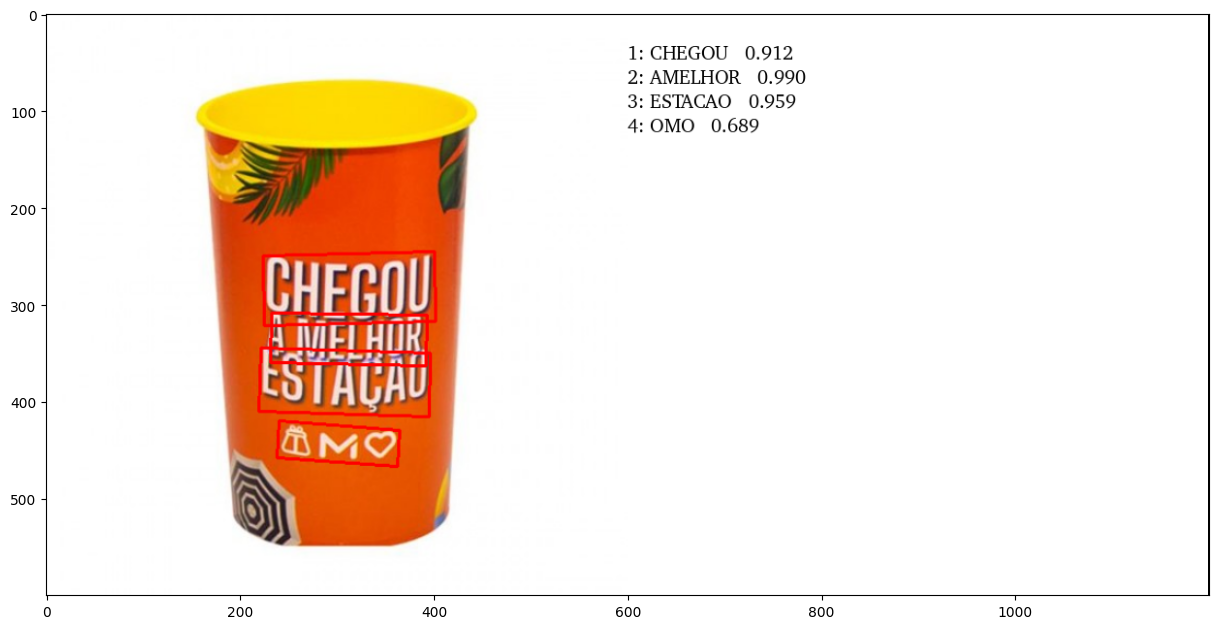

In [29]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path)

# show the image using matplotlib
plt.imshow(annotated)